### Dados

In [1]:
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
novos_usuarios = [100, 80, 110, 140, 150, 160, 170, 120, 110, 150, 200, 140]
usuarios_ativos_diarios = [1000, 750, 900, 1300, 1400, 1500, 1200, 1200, 1500, 1900, 2000, 1800]
receita_mensal = [10000, 8500, 9800, 10000, 11000, 12000, 10000, 10500, 13000, 13000, 20000, 17000]
tickets_suporte_abertos = [110, 75, 100, 140, 170, 160, 100, 130, 190, 200, 210, 140]
tickets_suporte_fechados = [100, 85, 100, 120, 130, 150, 140, 110, 130, 120, 150, 200]


In [2]:
import matplotlib.pyplot as plt
from cycler import cycler

In [5]:
from matplotlib.ticker import MultipleLocator
import numpy as np

### Rascunho

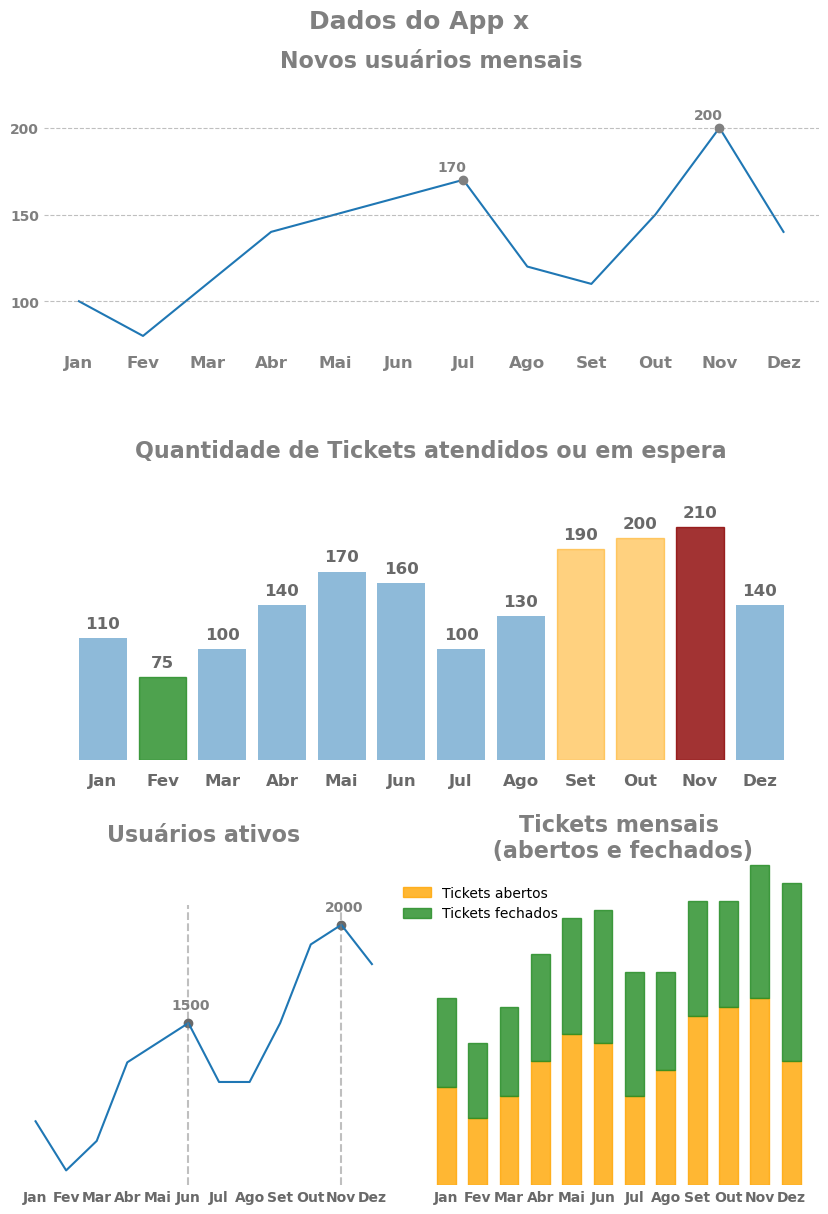

In [6]:
# Figura
mosaico='AA;BB;CD'
espacamento = {'hspace': 0.6, 'wspace': 0.4}
# espacamento = {'hspace': 0.6}

fig, axs = plt.subplot_mosaic(figsize=(10, 14),
                              mosaic=mosaico,
                              gridspec_kw=espacamento)
fig.suptitle("Dados do App x", y=0.94,
             color='Grey', fontsize= 18, fontweight='bold')

for i, m in enumerate(['A', 'B', 'C', 'D']):
    
    axs[m].set_frame_on(False)
    axs[m].set_yticks([])

titulos = [('Novos usuários mensais', 1.07),
            ('Quantidade de Tickets atendidos ou em espera', 1.15),
            ('Usuários ativos', 1.2),
            ('Tickets mensais\n (abertos e fechados)', 0.95)]

for i, par in enumerate(titulos):

    graficos = ['A', 'B', 'C', 'D']

    axs[graficos[i]].set_title(par[0], y=par[1],
                fontsize= 16, weight='bold', alpha=0.5)
        
    # # axs[m].set_xticks(ticks=meses)
    # axs[m].set_xticklabels(labels=meses, y=-0.03,
    #                         fontdict={'weight': 'bold', 
    #                                 'color': 'dimgrey',
    #                                 'size':12})



# Eixos
# axs['A'].set_frame_on(b=False)

## Linhas1
axs['A'].plot(meses, novos_usuarios, zorder=1)
# axs['A'].set_title('Novos usuários mensais', y= 1.05,
#                    fontsize= 14, weight='bold', alpha=0.5)

### Coordenadas
axs['A'].set_xticks(ticks=meses)
axs['A'].set_xticklabels(labels=meses, fontsize=12,
                         weight='bold', alpha=0.5)
axs['A'].tick_params(axis='x', size=0)

axs['A'].set_yticks(ticks=novos_usuarios)
axs['A'].tick_params(axis='y', size=0)
axs['A'].set_yticklabels(labels=novos_usuarios, weight='bold', alpha=0.5) # Muda a ordem do eixo!
axs['A'].set_yscale('linear') # Conserta a orde dos eixos
axs['A'].yaxis.set_major_locator(locator=MultipleLocator(50)) # 'locator' must be an instance of matplotlib.ticker.Locator
axs['A'].grid(visible=True, 
              axis='y',linestyle='--',
              color='gray', alpha=0.5)

# Rótulos
novos_usuarios_np = np.array(novos_usuarios)

# Maior:
# for i, n in enumerate(novos_usuarios_np):

#     # if n == novos_usuarios_np.max():
#     if n == np.max(novos_usuarios):
#         axs['A'].annotate(n, color='grey', weight='bold', 
#                           xy=(meses[i], novos_usuarios[i]),
#                           textcoords='offset points', xytext=(-8,6))
#         axs['A'].scatter(marker='o', color='grey', zorder=2,
#                          x=meses[i], y=novos_usuarios[i])
#     else:
#         pass

# Três maiores
indices_organizados = np.argsort(novos_usuarios)[-2:]

for i in indices_organizados:

    axs['A'].annotate(novos_usuarios[i], color='grey', weight='bold', 
                        xy=(meses[i], novos_usuarios[i]),
                        textcoords='offset points', xytext=(-8,6), ha='center')
    axs['A'].scatter(marker='o', color='grey', zorder=2,
                        x=meses[i], y=novos_usuarios[i])       

minimo = min(novos_usuarios)*0.9
maximo = max(novos_usuarios)*1.1
axs['A'].set_ylim(ymin=minimo, ymax=maximo)

## Barras verticais
barras = axs['B'].bar(meses, tickets_suporte_abertos)
# axs['B'].set_title('Quanitdade de Tickets atendidos ou em espera', 
#                    fontsize= 14, weight='bold', alpha=0.5,
#                    y=1.1)

axs['B'].bar_label(container=barras, 
                   weight='bold', color='dimgrey',fontsize=12,
                   padding=5)

axs['B'].tick_params(axis='both', size=0)
# axs['B'].set_yticks([])
axs['B'].set_xticks(meses)
axs['B'].set_xticklabels(meses, y=-0.03,
                         fontdict={'weight': 'bold', 
                                   'color': 'dimgrey',
                                   'size':12})


for i, t in enumerate(tickets_suporte_abertos):

    tickets_organizados = np.sort(tickets_suporte_abertos)[-3:]

    if t == max(tickets_suporte_abertos):
        barras[i].set_color('darkred')
        barras[i].set_alpha(0.8)
    elif t in tickets_organizados:
        barras[i].set_color('orange')
        barras[i].set_alpha(0.5)
    elif t == min(tickets_suporte_abertos):
        barras[i].set_color('forestgreen')
        barras[i].set_alpha(0.8)
    else:
        barras[i].set_alpha(0.5)

maximo = max(tickets_suporte_abertos)*1.1
axs['B'].set_ylim(ymin=0, ymax=maximo)

# Figura
# axs['B'].set_frame_on(False)

## Linhas2
axs['C'].plot(meses, usuarios_ativos_diarios)
# axs['C'].set_title('Usuários ativos', y=1.05,
#                    fontsize= 14, weight='bold', alpha=0.5)


for i, valor in enumerate(usuarios_ativos_diarios):

    if (valor > usuarios_ativos_diarios[i-1]) and (valor > usuarios_ativos_diarios[i+1]):
        axs['C'].scatter(x=meses[i], y=usuarios_ativos_diarios[i],
                         marker='o', color='dimgrey')
        axs['C'].annotate(text=usuarios_ativos_diarios[i], 
                          color='grey', weight='bold',
                          xy=(meses[i], usuarios_ativos_diarios[i]),
                          xytext=(-12, 10), textcoords='offset points')
        axs['C'].axvline(x=i, color='gray', linestyle='--', alpha=0.5)
    
axs['C'].tick_params('both', size=0)
axs['C'].set_xticks(meses)
axs['C'].set_xticklabels(meses,
                         fontdict={'weight': 'bold', 
                                   'color': 'dimgrey',
                                   'size':10})
# axs['C'].set_yticks([])
minimo = min(usuarios_ativos_diarios)*0.9
maximo = max(usuarios_ativos_diarios)*1.05
axs['C'].set_ylim(ymin=minimo, ymax=maximo)

axs['C'].set_position([0.1, 0.1, 
                       0.37, 0.2])

# axs['C'].set_frame_on(False)

# Barras verticais empilhadas
barras_inf = axs['D'].bar(meses, tickets_suporte_abertos, label='Tickets abertos', width=0.6)
barras_sup = axs['D'].bar(meses, tickets_suporte_fechados, bottom=tickets_suporte_abertos, 
             label='Tickets fechados', width=0.6)
# axs['D'].set_title('Tickets abertos e fechados mensais', 
#                    fontsize= 14, weight='bold', alpha=0.5)



# for i, barra in enumerate(barras):
#     barras[i].set_color('forestgreen')
#     # barra.set_color('forestgreen')

# barras = [barras_sup, barras_inf]
# colors = ['forestgreen', 'orange']

# for i, barra in enumerate(barras):
#     for bar in barra:
#         bar.set_color(colors[i])
#         bar.set_alpha(0.8)

# barras = [barras_sup, barras_inf]
# colors = ['forestgreen', 'orange']

# Using zip to iterate through both bars and colors simultaneously
for barra, color in zip([barras_sup, barras_inf], 
                        ['forestgreen', 'orange']):
    for bar in barra:
        bar.set_color(color)
        bar.set_alpha(0.8)

# # spacing = 0.5  # Espaçamento adicional
# ticks_position = np.arange(len(meses)) * (1 + 0.1)  # Aumentando o espaçamento

# # Ajustar os ticks no eixo x
# axs['D'].set_xticks(ticks_position)
axs['D'].set_xticks(meses)
axs['D'].set_xticklabels(meses, fontdict={'weight': 'bold',
                                          'color': "dimgrey",
                                          'size': 10})

axs['D'].tick_params(axis='x', size=0)
axs['D'].legend(bbox_to_anchor=(0.379, 0.75),
                frameon=False)
axs['D'].set_position([0.5, 0.1, 
                       0.4, 0.24])
# axs['D'].set_position([x0, y0, largura,altura])



# Ajustes finais
plt.show()

In [7]:
barras = [barra for barra in (barras_sup, barras_inf)]
print(barras[0][0])
print(barras[1][1])

Rectangle(xy=(-0.3, 110), width=0.6, height=100, angle=0)
Rectangle(xy=(0.7, 0), width=0.6, height=75, angle=0)


In [8]:
barras = [barras_sup, barras_inf]
colors = ['forestgreen', 'orange']

barras

[<BarContainer object of 12 artists>, <BarContainer object of 12 artists>]

### Final

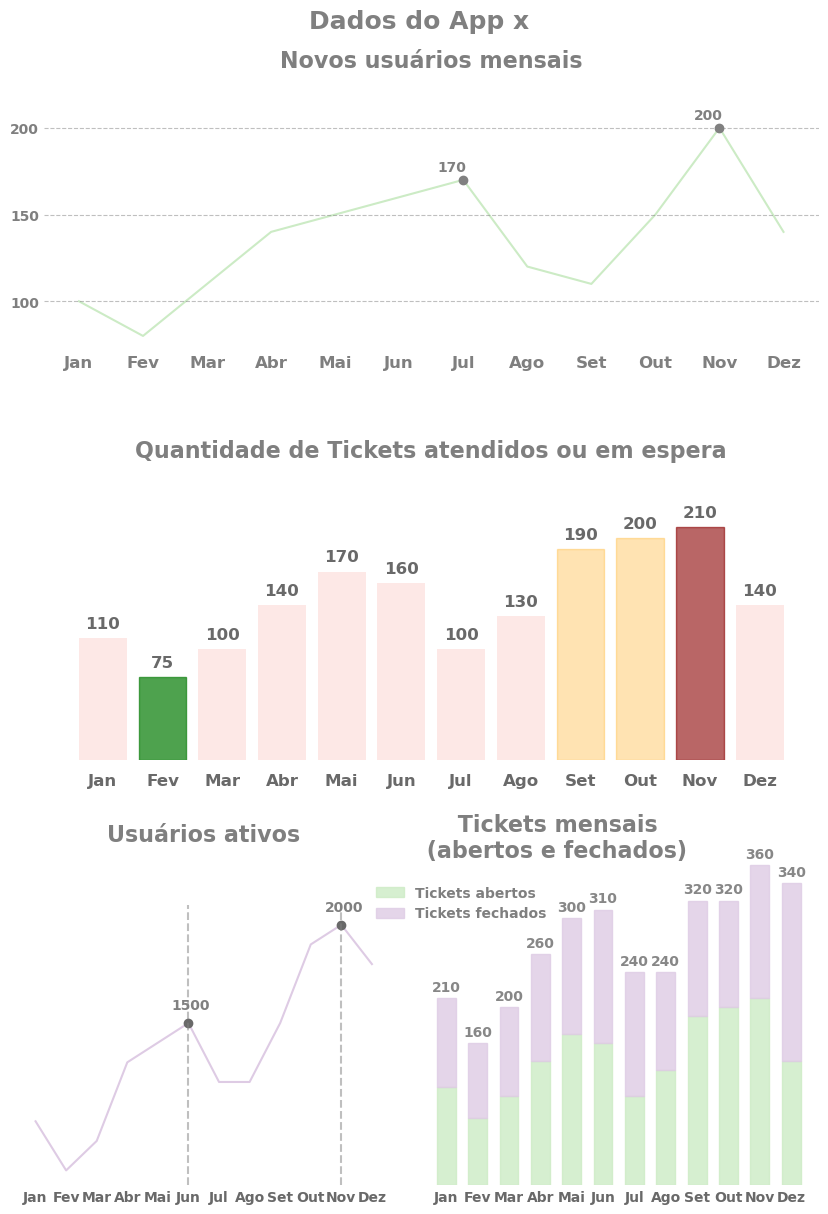

In [41]:
# Figura
mosaico='AA;BB;CD'
espacamento = {'hspace': 0.6, 'wspace': 0.4}

cores = plt.get_cmap('Pastel1').colors
paleta_cores = cycler('color', cores)
plt.rc('axes', prop_cycle=paleta_cores)


fig, axs = plt.subplot_mosaic(figsize=(10, 14),
                              mosaic=mosaico,
                              gridspec_kw=espacamento)
fig.suptitle("Dados do App x", y=0.94,
             color='Grey', fontsize= 18, fontweight='bold')

for i, m in enumerate(['A', 'B', 'C', 'D']):
    
    axs[m].set_frame_on(False)
    axs[m].set_yticks([])

titulos = [('Novos usuários mensais', 1.07),
            ('Quantidade de Tickets atendidos ou em espera', 1.15),
            ('Usuários ativos', 1.2),
            ('     Tickets mensais\n (abertos e fechados)', 0.95)]

for i, par in enumerate(titulos):

    graficos = ['A', 'B', 'C', 'D']

    if par != titulos[3]:
        axs[graficos[i]].set_title(par[0], y=par[1],
                    fontsize=16, weight='bold', alpha=0.5)
        
    else:   
        axs[graficos[i]].set_title(par[0], y=par[1],
                    fontsize=16, weight='bold', alpha=0.5,
                    loc='left')

# Eixos


## Linhas1
axs['A'].plot(meses, novos_usuarios, 
              color=cores[2], zorder=1)

### Coordenadas
axs['A'].set_xticks(ticks=meses)
axs['A'].set_xticklabels(labels=meses, fontsize=12,
                         weight='bold', alpha=0.5)
axs['A'].tick_params(axis='x', size=0)

axs['A'].set_yticks(ticks=novos_usuarios)
axs['A'].tick_params(axis='y', size=0)
axs['A'].set_yticklabels(labels=novos_usuarios, weight='bold', alpha=0.5) # Muda a ordem do eixo!
axs['A'].set_yscale('linear') # Conserta a orde dos eixos
axs['A'].yaxis.set_major_locator(locator=MultipleLocator(50)) # 'locator' must be an instance of matplotlib.ticker.Locator
axs['A'].grid(visible=True, 
              axis='y',linestyle='--',
              color='gray', alpha=0.5)


# Três maiores
indices_organizados = np.argsort(novos_usuarios)[-2:]

for i in indices_organizados:

    axs['A'].annotate(novos_usuarios[i], color='grey', weight='bold', 
                        xy=(meses[i], novos_usuarios[i]),
                        textcoords='offset points', xytext=(-8,6), ha='center')
    axs['A'].scatter(marker='o', color='grey', zorder=2,
                        x=meses[i], y=novos_usuarios[i])       

minimo = min(novos_usuarios)*0.9
maximo = max(novos_usuarios)*1.1
axs['A'].set_ylim(ymin=minimo, ymax=maximo)

## Barras verticais
barras = axs['B'].bar(meses, tickets_suporte_abertos)
axs['B'].bar_label(container=barras, 
                   weight='bold', color='dimgrey',fontsize=12,
                   padding=5)

axs['B'].tick_params(axis='both', size=0)
axs['B'].set_xticks(meses)
axs['B'].set_xticklabels(meses, y=-0.03,
                         fontdict={'weight': 'bold', 
                                   'color': 'dimgrey',
                                   'size':12})


for i, t in enumerate(tickets_suporte_abertos):

    tickets_organizados = np.sort(tickets_suporte_abertos)[-3:]

    if t == max(tickets_suporte_abertos):
        barras[i].set_color('darkred')
        barras[i].set_alpha(0.6)
    elif t in tickets_organizados:
        barras[i].set_color('orange')
        barras[i].set_alpha(0.3)
    elif t == min(tickets_suporte_abertos):
        barras[i].set_color('forestgreen')
        barras[i].set_alpha(0.8)
    else:
        barras[i].set_alpha(0.3)

maximo = max(tickets_suporte_abertos)*1.1
axs['B'].set_ylim(ymin=0, ymax=maximo)

## Linhas2
axs['C'].plot(meses, usuarios_ativos_diarios, 
              color=cores[3], zorder=1)

for i, valor in enumerate(usuarios_ativos_diarios):

    if (valor > usuarios_ativos_diarios[i-1]) and (valor > usuarios_ativos_diarios[i+1]):
        axs['C'].scatter(x=meses[i], y=usuarios_ativos_diarios[i],
                         marker='o', color='dimgrey', zorder=2)
        axs['C'].annotate(text=usuarios_ativos_diarios[i], 
                          color='grey', weight='bold',
                          xy=(meses[i], usuarios_ativos_diarios[i]),
                          xytext=(-12, 10), textcoords='offset points')
        axs['C'].axvline(x=i, color='gray', linestyle='--', alpha=0.5, 
                         zorder=2)
    
axs['C'].tick_params('both', size=0)
axs['C'].set_xticks(meses)
axs['C'].set_xticklabels(meses,
                         fontdict={'weight': 'bold', 
                                   'color': 'dimgrey',
                                   'size':10})
minimo = min(usuarios_ativos_diarios)*0.9
maximo = max(usuarios_ativos_diarios)*1.05
axs['C'].set_ylim(ymin=minimo, ymax=maximo)

axs['C'].set_position([0.1, 0.1, 
                       0.37, 0.2])


# Barras verticais empilhadas
barras_inf = axs['D'].bar(meses, tickets_suporte_abertos, label='Tickets abertos', width=0.6)
barras_sup = axs['D'].bar(meses, tickets_suporte_fechados, bottom=tickets_suporte_abertos, 
             label='Tickets fechados', width=0.6)

for barra, color in zip([barras_sup, barras_inf], 
                        [cores[3], cores[2]]):
    for bar in barra:
        bar.set_color(color)
        bar.set_alpha(0.8)
    
soma = [sup.get_height() + inf.get_height() for sup, inf in zip(barras_inf, barras_sup)]
axs['D'].bar_label(container=barras_sup, 
                   weight='bold',color='dimgrey', alpha=0.8,
                   labels=[height for height in soma],
                   padding=3)

axs['D'].set_xticks(meses)
axs['D'].set_xticklabels(meses, fontdict={'weight': 'bold',
                                          'color': "dimgrey",
                                          'size': 10})

axs['D'].tick_params(axis='x', size=0)

legenda = axs['D'].legend(bbox_to_anchor=(0.35, 0.75),
                frameon=False,
                prop={'weight': 'bold'})
for legend in legenda.get_texts():
    legend.set_alpha(0.5)

axs['D'].set_position([0.5, 0.1, 
                       0.4, 0.24])


# Ajustes finais
plt.show()